<a href="https://colab.research.google.com/github/hiidenpelto/data_science/blob/master/Panorama_da_COVID_19_no_Brasil_e_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados da COVID-19 no Brasil e no Mundo

Originado da China, o novo coronavírus se espalhou em uma velocidade surpreendente, alcançando todos os cantos do globo em poucos meses. Além da rápida propagação, o vírus se destacou por ser facilmente transmissível entre humanos e ter uma letalidade relativamente elevada.

Cientistas ao redor do mundo inteiro estão tentando entender o vírus e correndo contra o tempo para desenvolverem uma vacina, possibilitando que a vida de todos volte ao normal.

Isso pelo fato da enfermidade ter mudado a vida das pessoas em quase todos os países de uma forma nunca antes imaginada. Não só responsável por levar a óbito centenas de milhares de pessoas, provocou uma quarentena global e paralisou a atividade econômica.

<center><img width="50%" src="https://outraspalavras.net/wp-content/uploads/2020/03/200316-Covid19.jpeg"></center>

Dessa forma, torna-se essencial entender como o vírus vem se comportando no Brasil e no mundo, possibilitando aos cidadãos terem consciência da gravidade da pandemia. Através da Ciência de Dados, também é possível nortear a atuação dos gestores públicos para combaterem essa doença.

Assim, realizarei uma análise de alguns dados públicos acerca do vírus.

## Obtenção dos Dados

O presente *dataset* foi obtido no [Our World in Data](https://ourworldindata.org/coronavirus). Ele é atualizado diariamente e inclui dados de casos confirmados, mortes, testagem, dentre outras diversas variáveis relacionadas ao COVID-19.

Os dados de casos confirmados e mortes são obtidos junto ao **Centro Europeu de Prevenção e Controle de Doenças**

Já os dados de testes para detectar o novo coronavírus são coletados de relatórios oficiais e são atualizados por volta de duas vezes por semana.

As demais variáveis são obtidas em variadas fontes, como a Organização das Nações Unidas, Banco Mundial, etc.

Optou-se por trabalhar com o *dataset* do **Our World in Data** devido aos diversos conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais. Assim, considerei ser melhor obter os dados junto a uma organização especializada na coleta e tratamento de dados que bebe de diversas fontes diferentes para construir o seu arcabouço de dados.

### Dicionário de Variáveis
O primeiro passo de toda análise de dados é descrever o que cada coluna presente no *dataset* significa. Isso é essencial para termos um primeiro contato com a base de dados e passar ao leitor o significado de cada variável.
* `iso_code`: primeiras 3 letras do nome do país;
* `continent`: continente da localização;
* `location`: localização;
* `date`: data da observação;
* `total_cases`: total de casos confirmados;
* `new_cases`: novos casos confirmados;
* `total_deaths`: total de mortes;
* `new_deaths`: novas mortes;
* `total_cases_per_million`: total de casos confirmados por 1 milhão de habitantes;
* `new_cases_per_million`: novos casos por 1 milhão de habitantes;
* `total_deaths_per_million`: total de mortes por 1 milhão de habitantes;
* `new_deaths_per_million`: novas mortes por 1 milhão de habitantes;
* `total_tests`: total de testes;
* `new_tests`: novos testes;
* `new_tests_smoothed`: novos testes em uma janela de 7 dias;
* `total_tests_per_thousand`: total de testes por mil habitantes;
* `new_tests_per_thousand`: novos testes por mil habitantes;
* `new_tests_smoothed_per_thousand`: novos testes em uma janela de 7 dias por mil habitantes;
* `tests_units`: unidades utilizadas pelo país para reportar os dados de testes;
* `stringency_index`: medida composta por 9 indicadores, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, escalada em valores de 0 a 100;
* `population`: população em 2020;
* `population_density`: número de pessoas divididas por quilômetro quadrado;
* `median_age`: idade média da população em uma projeção das Nações Unidas para 2020;
* `aged_65_older`: parcela da população de 65 anos de idade ou mais;
* `aged_70_older`: parcela da população de 70 anos de idade ou mais;
* `gdp_per_capita`: PIB dos países;
* `extreme_poverty`: parcela da população vivendo em pobreza extrema;
* `cvd_death_rate`: taxa de mortes por doenças cardiovasculares em 2017;
* `diabetes_prevalence`: prevalência de diabetes (porcentagem da população entre 20 e 79 anos) em 2017;
* `female_smokers`: parcela das mulheres que fumam;
* `male_smokers`: parcela dos homens que fumam;
* `handwashing_facilities`: parcela da população que possui meios básicos para lavar as mãos;
* `hospital_beds_per_thousand`: número de leitos de hospitais por mil pessoas;
* `life_expectancy`: expectativa de nascimento com vida no parto em 2019.

    

### Importando os dados do COVID-19
Agora iremos importar as bibliotecas necessárias para realizarmos nossa análise e o *dataset* do [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data). Ele já está no formato csv, então iremos importar diretamente do link.

In [63]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Agora iniciaremos o que eu julgo ser a parte mais importante de todo projeto de ciência de dados: a análise exploratória dos dados. Com ela nós teremos um contato inicial com o *dataset*, vendo quais são os valores que estão inseridos nele, percebendo se existem valores nulos e se eles irão atrapalhar a análise, observando alguns dados estatísticos e extraindo *insigths* dos mesmos.


Vamos iniciar plotando as primeiras 5 entradas do nosso *dataset*.

In [ ]:
# 5 primeiras entradas do dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Vemos pelas 5 primeiras entradas que no Afeganistão, assim como na maioria dos países, no início do ano de 2020 não havia qualquer caso registrado do novo coronavírus. No Brasil, por exemplo, o primeiro caso foi detectado somente em fevereiro.

Agora analisaremos o tamanho total do nosso *dataset*.

In [ ]:
# tamanho do dataset
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])


Variáveis:  34
Entradas:  25924


O tamanho desse *dataset* é bastante significativo. São 34 colunas e 25924 entradas; certamente possibilitará a obtenção de um panorama bastante amplo de como o vírus vem se comportando no mundo.

O próximo passo é sabermos quais são os tipos de variáveis existentes.

In [ ]:
# ver os tipos de variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Vemos variáveis do tipo `float` e `object` apenas. De início já percebemos um pequeno problema, pelo fato da variável `data` estar no tipo `object`. Para podermos manipulá-la adequadamente, iremos precisar convertê-la para o formato `datetime`.

In [64]:
# converter a coluna 'date' para o formato datetime
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

Um ponto extremamente importante na análise exploratória é identificar quais são os valores ausentes e quantidade deles presente no *dataset*.

In [ ]:
# porcentagem de valores ausentes, em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.742979
new_tests_per_thousand             0.742979
total_tests_per_thousand           0.717250
total_tests                        0.717250
new_tests_smoothed_per_thousand    0.695225
new_tests_smoothed                 0.695225
tests_units                        0.671154
handwashing_facilities             0.593658
extreme_poverty                    0.402909
male_smokers                       0.282287
female_smokers                     0.273955
stringency_index                   0.198928
hospital_beds_per_thousand         0.172273
aged_65_older                      0.108664
gdp_per_capita                     0.106041
aged_70_older                      0.100563
median_age                         0.095934
cvd_death_rate                     0.095356
diabetes_prevalence                0.065615
population_density                 0.043242
life_expectancy                    0.013848
new_deaths_per_million             0.011341
total_deaths_per_million        

É gritante a enorme quantidade de valores ausentes presentes em algumas variáveis. Temos colunas que possuem quase 75% dos valores ausentes. Vamos deixar elas assim por enquanto; caso elas enviesem nossas próximas análises poderemos modificá-las ou até mesmo excluí-las.

## Análise Estatística e Gráfica

Concluída a análise exploratória, iniciaremos a exploração do nosso *dataset* pelo ângulo estatístico e plotaremos alguns gráficos para melhor visualizarmos o comportamento do vírus em alguns países.

O primeiro passo é ver qual país possui o maior número de casos e mortes provocadas pelo novo coronavírus.

Para isso selecionaremos a última data do nosso DataFrame (24/06/2020) por possuir o valor mais atualizado de casos totais.

Em seguida ordenaremos a lista pela ordem decrescente do valor de casos totais. Como o primeiro item da lista é o número de casos computados no mundo inteiro, selecionaremos a partir da segunda entrada.

In [83]:
# países com o maior número de casos
df.loc[df.date == "2020-06-24"].sort_values(by="total_cases", ascending=False)[1:]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25256,USA,North America,United States,2020-06-24,2347022.0,34720.0,121228.0,826.0,7090.644,104.893,366.245,2.495,28570233.0,512428.0,86.314,1.548,520898.0,1.574,units unclear,68.98,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3597,BRA,South America,Brazil,2020-06-24,1145906.0,39436.0,52645.0,1374.0,5390.992,185.529,247.672,6.464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
20042,RUS,Europe,Russia,2020-06-24,599705.0,7425.0,8359.0,153.0,4109.413,50.879,57.279,1.048,17803955.0,281203.0,122.000,1.927,303462.0,2.079,tests performed,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58
11210,IND,Asia,India,2020-06-24,456183.0,15968.0,14476.0,465.0,330.566,11.571,10.490,0.337,7352911.0,215195.0,5.328,0.156,181236.0,0.131,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66
25076,GBR,Europe,United Kingdom,2020-06-24,306210.0,921.0,42927.0,280.0,4510.650,13.567,632.339,4.125,4537055.0,76026.0,66.833,1.120,62391.0,0.919,tests performed,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21161,SYC,Africa,Seychelles,2020-06-24,11.0,0.0,0.0,0.0,111.857,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,9.834000e+04,208.354,36.2,8.606,5.586,26382.287,1.1,242.648,10.55,7.1,35.7,NaN,3.60,73.40
18777,PNG,Oceania,Papua New Guinea,2020-06-24,9.0,0.0,0.0,0.0,1.006,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.5,48.8,NaN,NaN,64.50
3690,VGB,North America,British Virgin Islands,2020-06-24,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07
3222,BES,North America,Bonaire Sint Eustatius and Saba,2020-06-24,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79


Faremos a mesma coisa com a coluna `total_deaths`, para identificarmos o país com o maior número de mortes pelo COVID-19.

In [84]:
# país com o maior número de mortes
df.loc[df.date == "2020-06-24"].sort_values(by="total_deaths", ascending=False)[1:]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25256,USA,North America,United States,2020-06-24,2347022.0,34720.0,121228.0,826.0,7090.644,104.893,366.245,2.495,28570233.0,512428.0,86.314,1.548,520898.0,1.574,units unclear,68.98,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
3597,BRA,South America,Brazil,2020-06-24,1145906.0,39436.0,52645.0,1374.0,5390.992,185.529,247.672,6.464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
25076,GBR,Europe,United Kingdom,2020-06-24,306210.0,921.0,42927.0,280.0,4510.650,13.567,632.339,4.125,4537055.0,76026.0,66.833,1.120,62391.0,0.919,tests performed,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
12379,ITA,Europe,Italy,2020-06-24,238833.0,113.0,34675.0,18.0,3950.145,1.869,573.502,0.298,5107093.0,53266.0,84.468,0.881,47669.0,0.788,tests performed,NaN,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
8665,FRA,Europe,France,2020-06-24,161267.0,517.0,29720.0,57.0,2470.635,7.921,455.315,0.873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,65273512.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,GRD,North America,Grenada,2020-06-24,23.0,0.0,0.0,0.0,204.410,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112519.0,317.132,29.4,7.304,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.70,72.40
16191,MNG,Asia,Mongolia,2020-06-24,215.0,0.0,0.0,0.0,65.583,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.96,3278292.0,1.980,28.6,4.031,2.421,11840.846,0.5,460.043,4.82,5.5,46.5,71.180,7.00,69.87
4275,KHM,Asia,Cambodia,2020-06-24,130.0,0.0,0.0,0.0,7.776,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16718971.0,90.672,25.6,4.412,2.385,3645.070,NaN,270.892,4.00,2.0,33.7,66.229,0.80,69.82
20442,VCT,North America,Saint Vincent and the Grenadines,2020-06-24,29.0,0.0,0.0,0.0,261.386,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110947.0,281.787,31.8,7.724,4.832,10727.146,NaN,252.675,11.62,NaN,NaN,NaN,2.60,72.53


O país liderando o ranking é os EUA, com um total de 2 milhões 347 mil e 22 casos confirmados e 121 mil e 228 mortos decorrentes do novo coronavírus.

É importante sabermos quais são os países que lideram o nefasto ranking de número de mortos pelo novo coronavírus.

Dessa forma, plotaremos um gráfico de barras para visualizarmos quais países são esses e compararmos o número de óbitos entre eles.

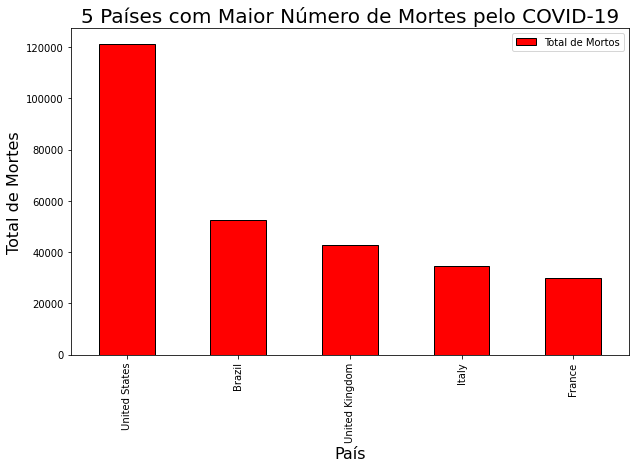

In [91]:
# plotar gráfico de barras dos 5 países com mais mortes
df_deaths = df.loc[df.date == '2020-06-24', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(10,6))
df_deaths.plot('location', 'total_deaths', kind="bar", color="red", edgecolor="black", ax=ax)
ax.set_title("5 Países com Maior Número de Mortes pelo COVID-19", fontsize=20)
ax.set_xlabel("País", fontsize=16)
ax.set_ylabel("Total de Mortes", fontsize=16)
ax.legend(["Total de Mortos"])

plt.show()

Os 5 países com o maior número de mortes em decorrência da COVID-19 são os EUA, Reino Unido, Itália, França e, para nossa infelicidade, o Brasil.

Vemos que os EUA lideram o rank com uma margem ampla, posto ter o dobro do número de óbitos em relação ao segundo colocado.

Ocorre que esses países são bem populosos e, consequentemente, terão mais pessoas infectadas e mortas pela doença. Uma outra análise possível é identificarmos quais são os países que possuem o maior número de casos e o maior número de mortes por milhão de habitantes.



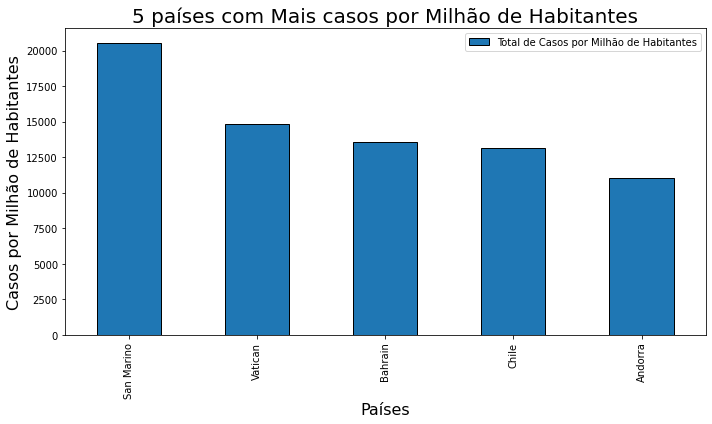

In [92]:
# gráfico dos 5 países com maior número de infectados por milhão de habitantes
df1 = df.loc[df.date == '2020-06-24', ['location', 'total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(10,6))
df1.plot('location', 'total_cases_per_million', kind="bar", edgecolor="black", ax=ax)
ax.set_title("5 países com Mais casos por Milhão de Habitantes", fontsize=20)
ax.set_xlabel("Países", fontsize=16)
ax.set_ylabel("Casos por Milhão de Habitantes", fontsize=16)
ax.legend(["Total de Casos por Milhão de Habitantes"])
plt.tight_layout()

Os dois locais com maior número de casos por milhão de habitantes, a República de San Marino e a cidade-estado do Vaticano, estão envoltos pela Itália. Isso revela como a doença se espalhou de forma avassaladora naquele território.

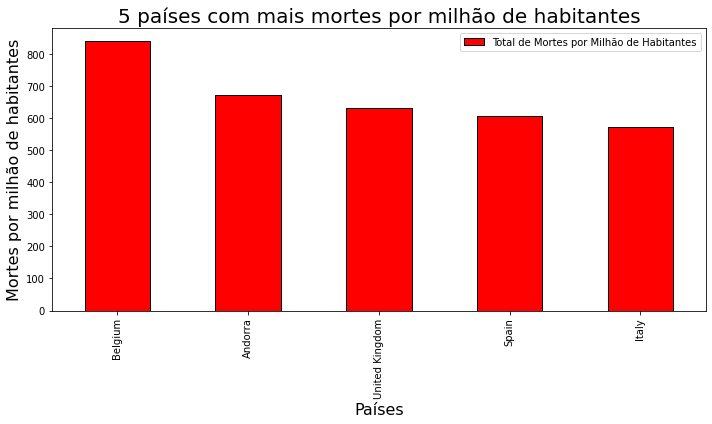

In [94]:
# 5 países com mais mortes por milhão de habitantes
df2 = df.loc[df.date == '2020-06-24', ['location', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(10,6))
df2.plot('location', 'total_deaths_per_million', kind="bar", color="red", edgecolor="black", ax=ax)
ax.set_title("5 países com mais mortes por milhão de habitantes", fontsize=20)
ax.set_xlabel("Países", fontsize=16)
ax.set_ylabel("Mortes por milhão de habitantes", fontsize=16)
ax.legend(["Total de Mortes por Milhão de Habitantes"])
plt.tight_layout()

Os 5 países com maior número de mortes ocasionadas pelo COVID-19 por milhão de habitantes estão todos localizados na Europa. A Bélgica lidera esse infeliz rank, com mais de 800 mortes por milhão de habitantes.


Agora vamos analisar o crescimento das mortes decorrentes do COVID-19 em todo o mundo. Para isso, plotaremos um gráfico de linha para facilitar a visualização da contaminação ao longo do tempo.

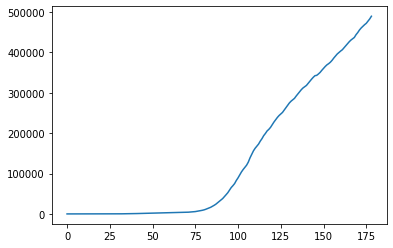

In [ ]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot();

Através do gráfico plotado acima, percebemos a rápida ascenção do número total de contaminações no mundo ao longo dos meses. Passados 175 dias desde a primeira morte, o mundo observa a triste marca de quase meio milhão de mortos.

## Análise Exploratória para o Brasil

Como vimos acima, o Brasil encontra-se na malfadada 2ª colocação tanto em relação ao número de infectados pelo novo coronavírus quanto na quantidade de mortos em decorrência da doença. 

Torna-se premente, portanto, tentar entendermos, através da análise dos dados do país, como o vírus vem se comportando.

Começaremos criando uma cópia do DataFrame cuja varíavel `location` abarque somente o Brasil.


In [115]:
# cópia do DataFrame
df_brasil = df.loc[df.location == "Brazil"].copy()

Em seguida iremos identificar o dia exato em que foi registrada a primeira contaminação pelo novo coronavírus.

In [ ]:
# data de registro do primeiro caso
df_brasil.loc[df_brasil["new_cases"] > 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,year_month
3451,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,2020-02


Também precisamos saber quando se deu o registro da primeira morte.

In [ ]:
# data de registro da primeira morte
df_brasil.loc[df_brasil["new_deaths"] > 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,year_month
3472,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,2020-03


Identificadas as datas de registro do primeiro caso e da primeira morte, podemos calcular qual foi o interregno de dias entre essas duas datas.

Para isso, basta subtrair um data pela outra utilizando o pacote `datetime`.

In [ ]:
# ver a quantidade de dias entre o primeiro caso e a primeira morte
from datetime import date
data = df_brasil.date.loc[3472] - df_brasil.date.loc[3451]
print("A quantidade de dias entre o primeiro caso registrado e a primeira morte no Brasil foi de", data.days, "dias")

A quantidade de dias entre o primeiro caso registrado e a primeira morte no Brasil foi de 21 dias


## Análise Estatística e Gráfica para o Brasil

Feita uma pequena análise exploratória, iniciaremos a nossa já conhecida análise estatística e gráfica. 

Uma forma de se fazer isso é compararmos o total de casos e mortes por milhão de habitantes dos 5 países com o maior número de casos e de mortes, tendo em vista que o Brasil está figurando nesses dois rankings.

Como vimos lá em cima, os 5 países com o maior número de casos são os EUA, Brasil, Rússia, Índia e Reino Unido.

Vamos ver quantos casos por milhão de habitantes esses países possuem.

In [96]:
# número de casos por milhão
print("Casos por milhão de habitantes nos EUA:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'USA')]['total_cases_per_million'].item())
print("Casos por milhão de habitantes no Brasil:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'BRA')]['total_cases_per_million'].item())
print("Casos por milhão de habitantes na Rússia:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'RUS')]['total_cases_per_million'].item())
print("Casos por milhão de habitantes no Reino Unido:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'GBR')]['total_cases_per_million'].item())
print("Casos por milhão de habitantes na Índia:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'IND')]['total_cases_per_million'].item())

Casos por milhão de habitantes nos EUA: 7090.644
Casos por milhão de habitantes no Brasil: 5390.991999999999
Casos por milhão de habitantes na Rússia: 4109.413
Casos por milhão de habitantes no Reino Unido: 4510.65
Casos por milhão de habitantes na Índia: 330.566


Já os 5 países com o maior número de mortes são os Estados Unidos, Reino Unido, Brasil, França e Itália. Vamos ver quantas mortes por milhão esses países possuem.

In [26]:
# número de mortes por milhão
print("Mortes por milhão de habitantes no Reino Unido:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'GBR')]['total_deaths_per_million'].item())
print("Mortes por milhão de habitantes nos Estados Unidos:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'USA')]['total_deaths_per_million'].item())
print("Mortes por milhão de habitantes no Brasil:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'BRA')]['total_deaths_per_million'].item())
print("Mortes por milhão de habitantes na França:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'FRA')]['total_deaths_per_million'].item())
print("Mortes por milhão de habitantes na Itália:", df.loc[(df.date == '2020-06-24') & (df.iso_code == 'ITA')]['total_deaths_per_million'].item())

Mortes por milhão de habitantes no Reino Unido: 632.339
Mortes por milhão de habitantes nos Estados Unidos: 366.245
Mortes por milhão de habitantes no Brasil: 247.672
Mortes por milhão de habitantes na França: 455.315
Mortes por milhão de habitantes na Itália: 573.502


Munidos desses dados, construíremos um novo DataFrame cujas variáveis serão somente esses países e seus respectivos números de casos e mortes por milhão. Para os países que não estiverem em um dos rankings, atribuiremos valor 0, posto tais valores não serem relevantes para nossa análise.

In [100]:
# criação de um novo DataFrame através do dictionary
dados = {"country": ["Brasil", "Reino Unido", "Estados Unidos", "França", "Itália", "Rússia", "Índia"],
         "cases_millions": [5390.991999999999, 4510.65, 7090.644, 0, 0, 4109.413, 330.566],
         "deaths_millions": [247.672, 632.339, 366.245, 455.315, 573.502, 0, 0]}

dados = pd.DataFrame(dados)

# 5 primeiras entradas do novo dataframe
dados.head()

,country,cases_millions,deaths_millions
0,Brasil,5390.992,247.672
1,Reino Unido,4510.650,632.339
2,Estados Unidos,7090.644,366.245
3,França,0.000,455.315
4,Itália,0.000,573.502


Munidos desse novo DataFrame, criaremos dois outros contendo o número de casos e mortes por milhão em ordem decrescente.

In [105]:
dados2 = dados.sort_values(by="cases_millions", ascending=False)[0:5]
dados3 = dados.sort_values(by="deaths_millions", ascending=False)[0:5]

Feito isso, conseguiremos plotar o gráfico e compararmos entre os países que possuem mais casos do novo coronavírus quais deles possuem mais casos por milhão de habitantes.

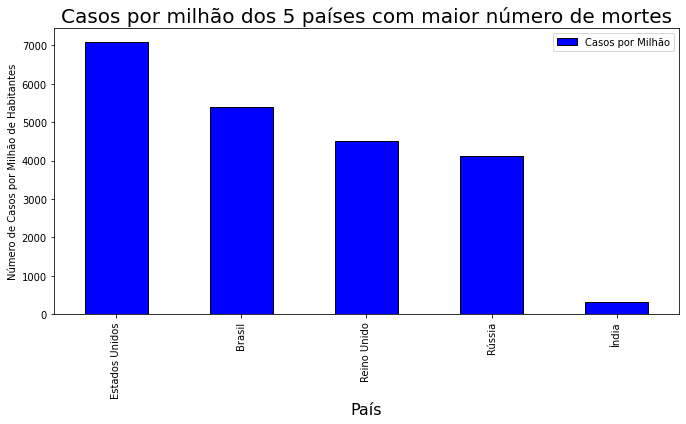

In [110]:
# gráfico de barras dos casos por milhão de habitantes
fig, ax = plt.subplots(figsize=(10,6))
dados2.plot('country', 'cases_millions', kind="bar", edgecolor="black", color="blue", ax=ax)
ax.set_title("Casos por milhão dos 5 países com maior número de mortes", fontsize=20)
ax.set_xlabel("País", fontsize=16)
ax.set_ylabel("Número de Casos por Milhão de Habitantes")
ax.legend(["Casos por Milhão"])
plt.tight_layout()

Para nossa infelicidade, o Brasil continua na segunda posição quanto ao número de casos por milhão de habitantes.

Observamos também que a Índia, por tem uma população de mais de um bilhão de habitantes, revelou um número de casos por milhão acentuadamente baixo em relação aos outros países.

Agora plotaremos um gráfico, possibilitando a comparação do número de mortes por milhão de habitantes dos 5 países com o maior número de mortes totais decorrentes do COVID-19.

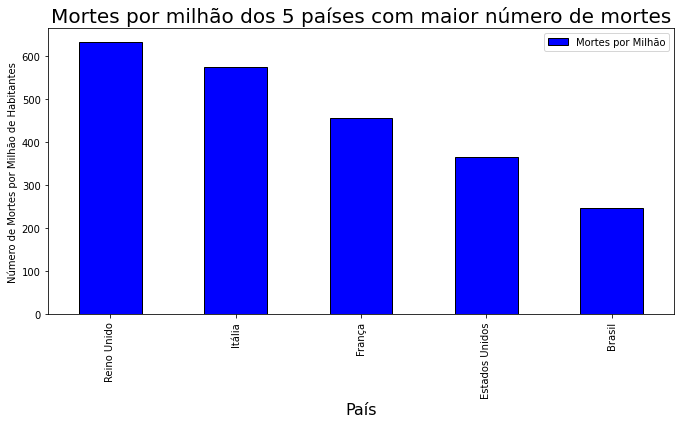

In [111]:
# gráfico de barras do número de mortes por milhão de habitantes
fig, ax = plt.subplots(figsize=(10,6))
dados3.plot('country', 'deaths_millions', kind="bar", edgecolor="black", color="blue", ax=ax)
ax.set_title("Mortes por milhão dos 5 países com maior número de mortes", fontsize=20)
ax.set_xlabel("País", fontsize=16)
ax.set_ylabel("Número de Mortes por Milhão de Habitantes")
ax.legend(["Mortes por Milhão"])
plt.tight_layout()

Dessa vez o Brasil figurou na última posição desse ranking, possuindo menos de 300 mortes por milhão de habitantes pelo novo coronavírus.

Finalizando a análise, plotaremos um gráfico de linhas para vermos a evolução do total de casos e de mortes do COVID-19 ao longo do tempo no Brasil.

Selecionaremos o intervalo de tempo correspondente à data em que se foi indentificado o primeiro caso e a ultima data do nosso *dataset*.

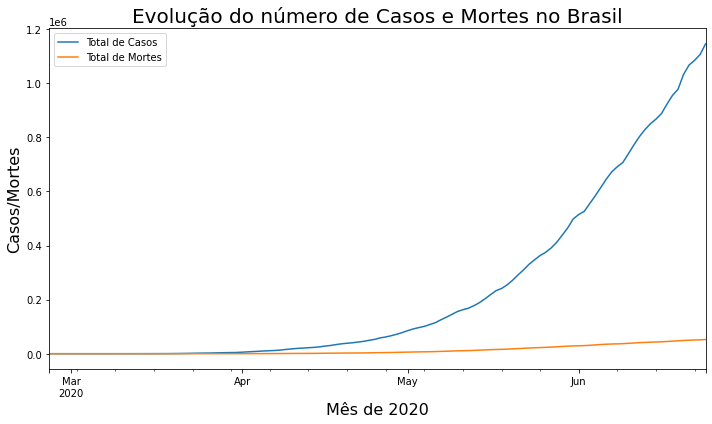

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
df_brasil.loc['2020-02-26':'2020-06-24', 'total_cases'].plot(kind="line", ax=ax)
df_brasil.loc['2020-02-26':'2020-06-24', 'total_deaths'].plot(kind="line", ax=ax)
ax.set_title("Evolução do número de Casos e Mortes no Brasil", fontsize=20)
ax.set_xlabel("Mês de 2020", fontsize=16)
ax.set_ylabel("Casos/Mortes", fontsize=16)
ax.legend(["Total de Casos", "Total de Mortes"])
plt.tight_layout()

Com esse gráfico depreendemos bem o quão rápida foi a ascenção do número total de casos do novo coronavírus no Brasil.

Também fica facilmente observável o crescimento paulatino da quantidade de mortos pelo vírus.


# Conclusão

O mundo jamais vivenciou uma situação parecida: quarentena em massa, fechamento de estabelecimentos, proibição de reuniões, *lockdown* de cidades inteiras, entre tantas outras medidas inimaginadas até o ano passado.

Certamente o novo coronavírus mudou a vida cotidiana de todos nós radicalmente, mudanças essas que a cada novo dia se enraizam cada vez mais na cultura dos povos e prometem se tornar permanentes.

A gravidade da doença se revelou através dos dados analisados: a COVID-19 já contaminou milhões de indivíduos e matou centenas de milhares de pessoas ao redor do globo. Dentre os países com mais contaminados e mais óbitos decorrentes do vírus, o Brasil ocupa o 2º lugar nesse infeliz ranking.

Visualizamos como se deu o rápido avanço da doença ao longo de poucos meses, revelando a fácil e rápida propagação do vírus entre indivíduos, aspecto mais preocupante para os cientistas.

Ademais, através da comparação gráfica, depreendemos que o Brasil, apesar de se encontrar em 2º lugar no número de mortos, está em 5º na quantidade de óbitos calculados por milhões de habitantes. De qualquer forma, não é uma posição agradável para qualquer país estar.

Espero ter contribuído, através desse projeto, para facilitar a compreensão de todos acerca de como vem agindo a doença no Brasil e no mundo, alertando para a gravidade do vírus e dando uma fagulha de esperança: estamos cada vez mais próximos do fim dessa pandemia.